# 0. Herramientas

In [69]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math
import scipy as sc
import ipywidgets as widget

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [172]:
class RegresionLineal:
    def __init__(self, alpha=0.003, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m

# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 30 de Septiembre, 2021 23:59
</div>

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [89]:
J = sym.Function("J")
b = sym.Symbol("beta")
bj = sym.Symbol("beta_j")
m = sym.Symbol("m")
n = sym.Symbol("n")
y = sym.Function("y")
ygorro = sym.Function("y'")
i = sym.Symbol("i")
j = sym.Symbol("j")
x = sym.Symbol("x")
xj = sym.Symbol("x_j")
b0 = sym.Symbol("beta0")
b1 = sym.Symbol("beta1")

In [90]:
suma = sym.Sum( (ygorro(sym.Indexed(x,i))-y(sym.Indexed(x,i))) * sym.Indexed(xj,i) , (i,1,m))

In [91]:
suma

Sum((-y(x[i]) + y'(x[i]))*x_j[i], (i, 1, m))

In [92]:
lado_izquierdo = (1/m)*suma 

In [93]:
lado_derecho = sym.Derivative(J(b0,b1),bj)

In [94]:
sym.simplify(lado_derecho-lado_izquierdo) == 0

False

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 


**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [4]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

La función convergió con beta: [2.47231477 0.55235105] en la iteración 5240


AttributeError: 'NoneType' object has no attribute 'historia'

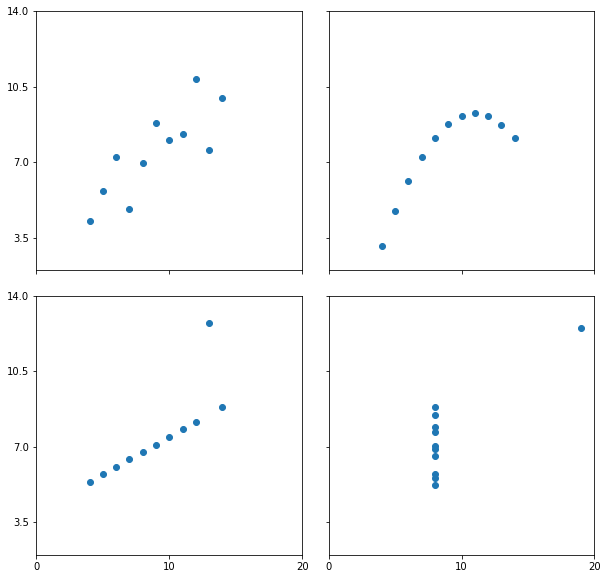

In [181]:
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10),
                        gridspec_kw={'wspace': 0.1, 'hspace': 0.1})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(3.5, 7, 10.5, 14))

axs[0,0].scatter(x1,y1)
axs[0,1].scatter(x1,y2)
axs[1,0].scatter(x1,y3)
axs[1,1].scatter(x4,y4)

RegLin = RegresionLineal()
RL00 = RegLin.gradientDescent(x1,y1)

axs[0,0].plot(RL00.historia)

## Problema 5

Use el archivo `radioactive_decay.dat`

In [5]:
%cat dat a/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

In [6]:
lista_x=[]
lista_y=[]
with open('radioactive_decay.txt', 'r') as f:
    i=0
    content = f.readlines()
    for x in content:
        linea = x.split()
        i+=1
        lista_x.append(linea[0])
        lista_y.append(linea[1])
        
del lista_x[0]
del lista_y[0]
array_x = 

array_y = np.array([float(i) for i in lista_y])

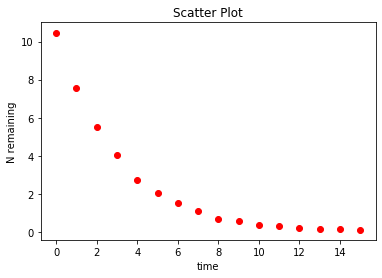

In [7]:
plt.title("Scatter Plot")
plt.xlabel("time")
plt.ylabel("N remaining")

plt.scatter(array_x,array_y, color="red")

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

Considerando que los datos tienen forma de exponencial inversa, y la tasa de decrecimiento se va achicando a la mitad (3,2,1.5,.75,...), se le aplica un logaritmo base 2

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[10.48  7.54  5.49  4.02  2.74  2.02  1.5   1.09  0.68  0.57  0.37  0.31
  0.19  0.15  0.13  0.11]
[6.573991382900154, 6.098989094631367, 5.6412307203679015, 5.191620072541632, 4.63860046432323, 4.198779864114497, 3.7693870718585836, 3.308752706139629, 2.6280312226130422, 2.3734583955274444, 1.7500217469916526, 1.494764691749578, 0.7884958948062883, 0.4474589769712214, 0.24100809950379487, 0.0]


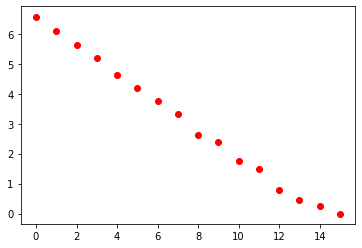

In [118]:
datos_linearizados = []
for i in array_y:
    datos_linearizados.append(math.log(i,2))

elem_minimo = min(datos_linearizados)

for i in range(0, len(datos_linearizados)):
    datos_linearizados[i] = datos_linearizados[i] - elem_minimo

print(array_x)
print(array_y)
print(datos_linearizados)

plt.scatter(array_x,datos_linearizados, color="red")

In [125]:
with open('transform_radioactive_decay.txt', 'w') as file:
    for i in datos_linearizados:
        file.write(str(i) + "\n")

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [139]:
datos_linearizados_leidos=[]
with open('transform_radioactive_decay.txt', 'r') as file:
    content = file.readlines()
    for x in content:
        x = x.replace("\n", "")
        datos_linearizados_leidos.append(x)
        
array_datos_leidos = np.array([float(i) for i in datos_linearizados_leidos])
print(array_datos_leidos)

[6.57399138 6.09898909 5.64123072 5.19162007 4.63860046 4.19877986
 3.76938707 3.30875271 2.62803122 2.3734584  1.75002175 1.49476469
 0.78849589 0.44745898 0.2410081  0.        ]


**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.